# Decision Tree Modelling Iris dataset

In this Machine Learning example Scikit-learn library is used to develop machine learning model for classification problem. Here we will be implementing a simple decision tree model to classify iris plants into three species using the lengths and widths of their petals and sepals, a [classic data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) in the machine learning community. 

The iris samples in question fall into three species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*.  At first glance, the three species can look remarkably like each other, and this is especially the case for the latter two.  However, thanks to the careful measurements taken and presented by Anderson and Fisher, an individual sample may be classified with a high degree of accuracy via machine learning models if the relevant measurements are taken.

##### Problem definition:
Develop predictive Machine Learning model to predict (classify) Iris specirs based on four measured features: petal length,  sepal length, petal with and sepal petal. 
(See below picture to know what these represent)

## Machine Learning model

The decision tree models are the simplest form of tree-based models, and are arguably the simplest form of supervised multivariate classification models. A series of logical tests (generally in the form of boolean comparisons) are applied to the sample entries and their resulting subsets in turn to arrive at a final decision. It is very easy to visualize the decision process in a simple flowchart to trace the rational of every assignment made by a decision tree model, making it among the most interpretable of models. The are called 'white box'type of models. 

## Scikit-learn
We will be using the **Scikit-learn library** for the machine Learning example [sklearn](https://scikit-learn.org). It is the most comprehensive library of Machine Learning algoritms. It is simple and efficient library for predictive data analysis, accessible to everybody (Open Source), and reusable in various contexts, not only for scientific work. It built on NumPy, Pandas, SciPy, and matplotlib essential libraries. 

The following code, strongly derived from [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html), shows how a simple decision tree model may be applied and visualized.

**Let's start coding**

### 1. Python packages imports 

In [6]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Jupyter notebook visualization 
%matplotlib inline
import seaborn as sns
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

# Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

### 2. Data 
The iris dataset can be easily downloaded from Seaborn package

In [7]:
# creating DataFrame called df
df = sns.load_dataset('iris') 

We can check the the data header by pandas method .head()

In [8]:
# view header of the data set
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- What are the available variables describing the Iris flowers?

-  How many?

- Which of the columns represent the target variable? 

- What is the data type of the target?

### 3. Exploratory Data Analysis (EDA)

Get basic info about the dataset with `.info()` method.

In [9]:
# do yourself 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Are the missing data for any record? 

Use `.isnull().any()` method

In [13]:
# do yourself - check missing data records? 
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

What is the dataset dimensionality?

Use `.shape` method. The same as NumPy uses. See there is not a bracket here. Eghh :-( 

In [12]:
# do yourself - check data set dimensionality
df.shape

(150, 5)

In [11]:
# See what the variables mean! 

<img src="iris-dataset.png" style="height:500px"> 

Let's explore the dataset in the feature space.

Use `Seaborn` method `.pairplot()`. Pass df as data parameter and select 'species' attribute for colloring the pair plots. 

    data=df

    hue='species'

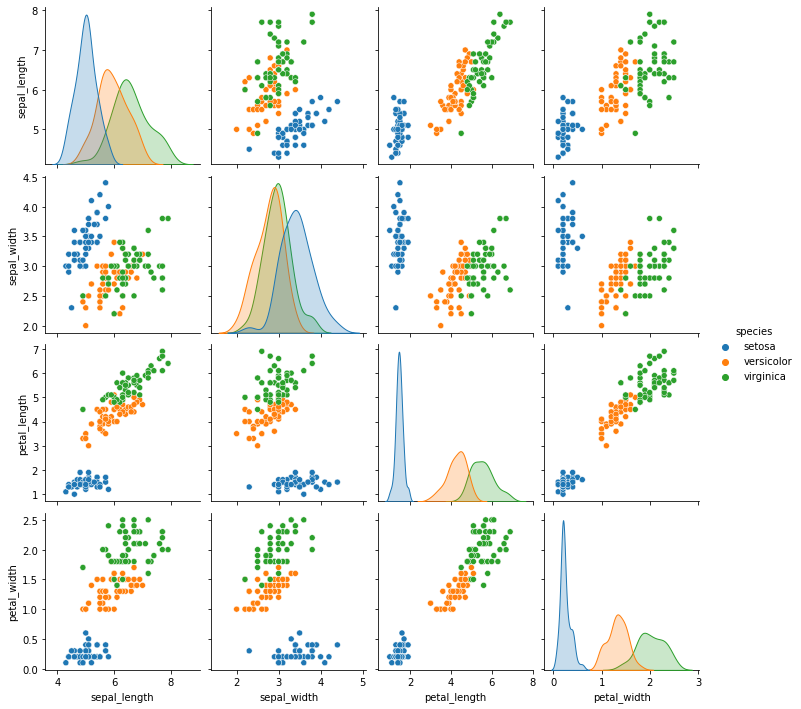

In [14]:
# do yourself - visualize feature space in pairplot
# Beware, it may take few seconds to run! 

sns.pairplot(data=df, hue = 'species')

Great! What do we see? 

- Is the problem linear? 

- Which class(es) are simply separable and which classes are more difficult? 

- Can you guess what level of noise / uncertainty  is in the data? 

### 4. Data preparation (for Machine Learning modelling / or other analysis)

Boring but extremely importnt step to succeed.

In [17]:
# get the names of out attributes (features)
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
# target variable are the species 
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Prepare two variables: X and y. 

    X .. all features
    y .. target variable to predict based on the features

In [24]:
target_variable = df['species']
df1 = df.copy()
X = df1.drop('species', axis = 1)

In [25]:
# Check the two 
print(X.shape, target_variable.shape)

(150, 4) (150,)


In [21]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
target_variable.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

y (target variable) need to be converted to numbers!

In [27]:
# transformation
le = LabelEncoder()
target_variable = le.fit_transform(target_variable) 
target_variable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# species coding? Which one is which? 
spec_codes  = pd.concat([df['species'], pd.DataFrame(target_variable)], axis=1)

for col in spec_codes:
    print(spec_codes[col].unique())

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [29]:
# now our y is ok
y = target_variable

### 5. Splitting training and testing datasets

Simple concept to evaluate possible overfittng problem!

In [32]:
# here simple random splitting, you know better ways 
# 90% for training, rest for testing 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.9, random_state = 42)

print("Training set ", X_train.shape)
print("Testing set ", X_test.shape)

Training set  (15, 4)
Testing set  (135, 4)


### 6. Machine Learning model training

In [39]:
# ctreate instance of the Decition Tree
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=3, splitter='random', random_state = 42) 

# the hyperparametrs: max. depth, min. samples, splitter are here set by the user to these values
# one can use Grid Search or Random Search techniques to finetune the model 

In [40]:
# fit the model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42,
                       splitter='random')

In [41]:
# what is the model score during the training phase? 
tree.score(X_test, y_test)

0.9481481481481482

In [42]:
# do better cross-validation
cv_tree = cross_validate(tree, X_train,y_train, cv=5, scoring='f1_weighted', return_estimator=True)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [43]:
print('Prumer vazeneho F1-skore: {:.3f} a std {:.3f}'.format(
        cv_tree['test_score'].mean(),
        cv_tree['test_score'].std())
     )

Prumer vazeneho F1-skore: 1.000 a std 0.000


In [ ]:
# Overfitted? 

### 7. Model evaluation

In [44]:
# first run model predictions on separate test set!
y_pred = tree.predict(X_test)

In [ ]:
# TODO accuracy metric explained! 
# 

In [45]:
# report accuracy metrics
print("Classification report \n", classification_report(y_test,y_pred)) 

Classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.89      0.95      0.92        44
           2       0.95      0.91      0.93        43

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135



In [46]:
# reminder
for col in spec_codes:
    print(spec_codes[col].unique())

['setosa' 'versicolor' 'virginica']
[0 1 2]


Text(0.5, 1.0, 'F1-score: 0.948')

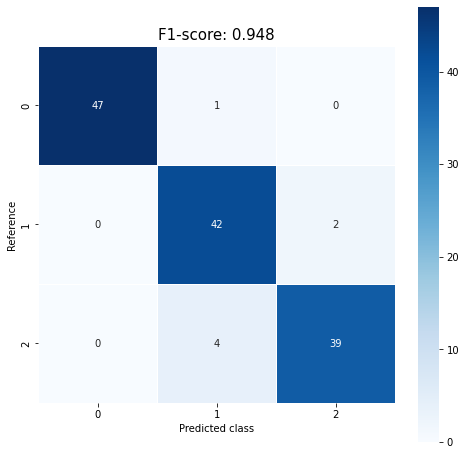

In [47]:
# Confusion matrix?  A bit more interpretable result 
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidths=.5, annot=True, square = True, cmap = 'Blues')
plt.ylabel('Reference')
plt.xlabel('Predicted class')
all_sample_title = 'F1-score: {0}'.format(round(f1_score(y_test, y_pred, average='weighted'), 3))
plt.title(all_sample_title, size = 15)

In [49]:
# Howabout stratified sampling? 
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

i = 1
for train_index, test_index in kf5.split(X):
    print("Running {} loop".format(i))
    # splitting 
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
        
    # model training
    tree.fit(X_train, y_train) 
    print("Accuracy for fold no. {} on test set: {}".format(i, f1_score(y_test, tree.predict(X_test), average='weighted')))
    i += 1 

Running 1 loop
Accuracy for fold no. 1 on test set: 1.0
Running 2 loop
Accuracy for fold no. 2 on test set: 1.0
Running 3 loop
Accuracy for fold no. 3 on test set: 0.900347487075176
Running 4 loop
Accuracy for fold no. 4 on test set: 0.9333333333333333
Running 5 loop
Accuracy for fold no. 5 on test set: 0.9666666666666667


### 8. Model visualization (interpretable machine learning) 

Remeber Tree-based models are not blackboxes but whiteboxes.

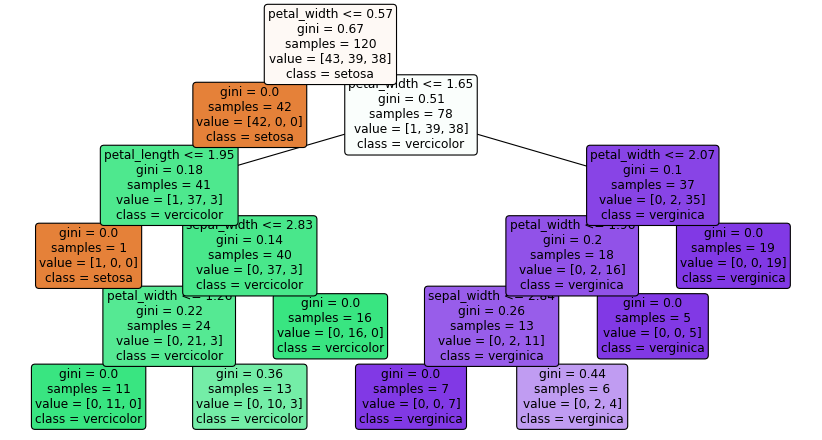

In [52]:
# plot the model 
figure(figsize=(13, 7), dpi=80)
my_decision_tree = plot_tree(decision_tree=tree, feature_names = df1.columns,
class_names =["setosa", "vercicolor", "verginica"] , filled=True ,  precision=2, rounded=True)

More **questions**: 

    - Howabout other ML models? 
    
    - Would be Random Forest more suitable? 
    
    - Would be SVM suitable? 
    
    - Would be Artificial Neural Network suitable? 